In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
weather = pd.read_csv('C:/Users/user/github/Data/capstone/total_eda_real.csv', encoding='utf-8')

In [3]:
weather

,지점,위도,경도,지점명,일시,기온,풍속,풍향,습도,강수량
0,90,38.2509,128.5647,속초,2021-01-01 00:00,-6.3,2.6,290.0,30.0,0.0
1,90,38.2509,128.5647,속초,2021-01-01 01:00,-6.7,4.3,320.0,30.0,0.0
2,90,38.2509,128.5647,속초,2021-01-01 02:00,-6.7,2.0,340.0,26.0,0.0
3,90,38.2509,128.5647,속초,2021-01-01 03:00,-7.2,1.3,320.0,25.0,0.0
4,90,38.2509,128.5647,속초,2021-01-01 04:00,-7.6,0.8,180.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1662115,295,34.8166,127.9264,남해,2022-12-30 20:00,3.5,1.7,290.0,52.0,0.0
1662116,295,34.8166,127.9264,남해,2022-12-30 21:00,2.3,1.4,270.0,60.0,0.0
1662117,295,34.8166,127.9264,남해,2022-12-30 22:00,0.8,1.1,270.0,67.0,0.0
1662118,295,34.8166,127.9264,남해,2022-12-30 23:00,0.8,0.7,290.0,65.0,0.0


In [4]:
generation = pd.read_csv('C:\\Users\\user\\github/Data\\capstone\\발전소/한국남부발전(주)_하동보건소 태양광발전실적_20220630.csv', encoding='cp949')

In [5]:
generation.년월일

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
3463    2022-06-26
3464    2022-06-27
3465    2022-06-28
3466    2022-06-29
3467    2022-06-30
Name: 년월일, Length: 3468, dtype: object

In [6]:
start = pd.to_datetime('2013-01-01 01:00:00')
end = pd.to_datetime('2022-07-01 00:00:00')

In [7]:
start

Timestamp('2013-01-01 01:00:00')

In [8]:
generation.drop('년월일', axis=1)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0.0,0.000,0.000,0.540,5.036,...,12.460,4.220,1.888,0.024,0.000,0.000,0,0,0,0
1,0,0,0,0,0,0.0,0.000,0.000,1.528,8.400,...,25.696,18.116,6.624,0.096,0.000,0.000,0,0,0,0
2,0,0,0,0,0,0.0,0.000,0.000,1.664,5.852,...,26.504,9.568,2.872,0.096,0.000,0.000,0,0,0,0
3,0,0,0,0,0,0.0,0.000,0.000,1.440,9.424,...,23.532,18.024,9.572,0.036,0.000,0.000,0,0,0,0
4,0,0,0,0,0,0.0,0.000,0.000,1.340,9.160,...,24.088,17.160,10.268,0.056,0.000,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0,0,0,0,0,0.0,0.000,1.388,4.508,6.276,...,14.648,13.588,7.964,4.184,1.668,0.000,0,0,0,0
3464,0,0,0,0,0,0.0,0.044,0.636,1.264,1.876,...,10.564,4.920,1.616,1.356,0.016,0.000,0,0,0,0
3465,0,0,0,0,0,0.0,0.456,2.572,5.152,5.676,...,7.356,7.952,3.732,1.364,0.228,0.168,0,0,0,0
3466,0,0,0,0,0,0.0,0.828,1.816,4.172,5.072,...,9.452,3.988,2.636,1.256,0.852,0.160,0,0,0,0


In [9]:
generation.drop('년월일', axis=1).values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
gen = generation.drop('년월일', axis=1).values

In [11]:
gen = pd.DataFrame(np.reshape(gen,(-1,1)))

In [12]:
len(pd.date_range(start, end, freq='H'))

83232

In [13]:
len(gen)

83232

In [14]:
gen.set_index(pd.date_range(start, end, freq='H'), inplace=True)

In [15]:
weather['일시']

0          2021-01-01 00:00
1          2021-01-01 01:00
2          2021-01-01 02:00
3          2021-01-01 03:00
4          2021-01-01 04:00
                 ...       
1662115    2022-12-30 20:00
1662116    2022-12-30 21:00
1662117    2022-12-30 22:00
1662118    2022-12-30 23:00
1662119    2022-12-31 00:00
Name: 일시, Length: 1662120, dtype: object

In [16]:
real_weather = weather.loc[weather['일시'] < '2022-07-01 00:00:00']

In [17]:
x = real_weather[real_weather['지점명'] == '순천']

In [18]:
latitude = x['위도'].values[0]
longitude = x['경도'].values[0]

In [19]:
x_weather = x.drop(['지점','지점명', '위도', '경도'], axis=1)

In [20]:
x_weather

,일시,기온,풍속,풍향,습도,강수량
682344,2021-01-01 00:00,-2.3,3.8,290.0,81.0,0.0
682345,2021-01-01 01:00,-3.1,3.3,290.0,71.0,0.0
682346,2021-01-01 02:00,-3.7,3.6,290.0,73.0,0.0
682347,2021-01-01 03:00,-4.2,3.1,270.0,76.0,0.0
682348,2021-01-01 04:00,-4.2,2.4,270.0,76.0,0.0
...,...,...,...,...,...,...
695443,2022-06-30 20:00,25.5,1.3,160.0,88.0,0.0
695444,2022-06-30 21:00,24.9,0.7,110.0,92.0,0.0
695445,2022-06-30 22:00,24.5,0.1,0.0,94.0,0.0
695446,2022-06-30 23:00,24.6,0.1,0.0,92.0,0.0


In [22]:
x_weather_norm = (x_weather - np.mean(x_weather)) / np.std(x_weather)
x_tr = x_weather_norm.iloc[:7000,:]
x_ts = x_weather_norm.iloc[7000:,:]
gen_norm = (gen - np.mean(gen)) / np.std(gen)

x_train = tf.convert_to_tensor(x_tr, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_ts, dtype=tf.float32)


In [23]:
y = gen_norm.values
y = y.reshape(-1,1)

y_tr = y[:7000]
y_ts = y[7000:]

In [24]:
def normalize_dataframe(df):
    # 0번 열의 datetime 값을 numpy 배열로 변환하고 데이터프레임에서 제거
    datetime = df.iloc[:, 0].to_numpy()
    df = df.drop(df.columns[0], axis=1)

    # 나머지 값을 numpy 배열로 변환하고 정규화
    arr = df.to_numpy().astype(np.float32)
    arr_normalized = (arr - arr.mean(axis=0)) / arr.std(axis=0)

    # numpy 배열을 tensor로 변환
    tensor = tf.convert_to_tensor(arr_normalized)

    # datetime 값을 tensor로 변환
    datetime_tensor = tf.convert_to_tensor(datetime)

    # datetime 값과 tensor 값을 다시 합쳐서 데이터프레임으로 변환
    arr_normalized = np.hstack([datetime[:, np.newaxis], arr_normalized])
    df_normalized = pd.DataFrame(arr_normalized, columns=['datetime'] + df.columns.tolist())
    df_normalized.iloc[:, 0] = datetime_tensor.numpy()

    return df_normalized

In [25]:
dd = normalize_dataframe(x_weather)

In [26]:
gen = gen.loc[('2021-01-01 00:00:00' < gen.index) & (gen.index <= '2022-12-31 00:00:00')]

In [27]:
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3

In [28]:
tus = Location(latitude, longitude, 'ROK')

In [29]:
time = pd.date_range(start=start, end = end, freq='H', tz = tus.tz)

In [30]:
cs = tus.get_clearsky(time)

In [35]:
cs = cs.loc[('2021-01-01 00:00:00' < cs.index) & (cs.index <= '2022-12-31 00:00:00')]

<Axes: >

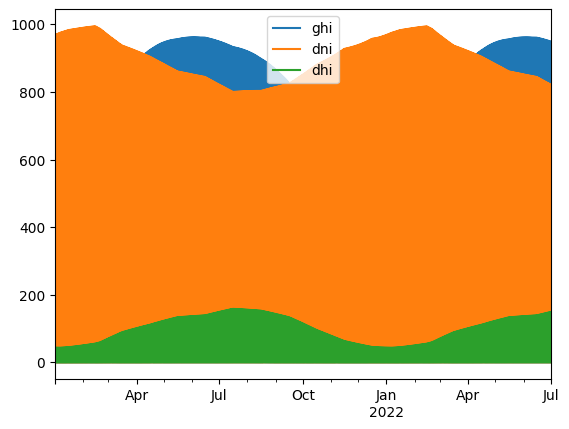

In [36]:
cs.plot()

<Axes: >

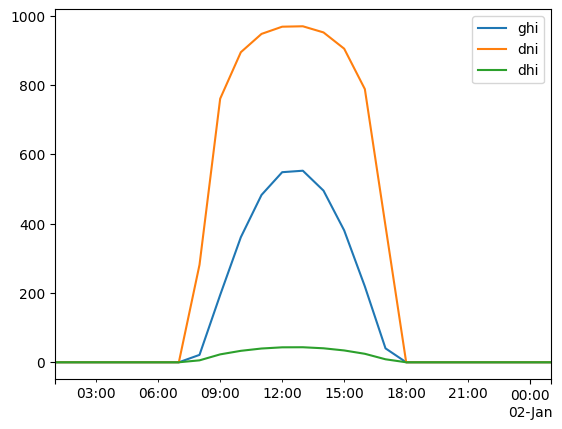

In [40]:
cs.iloc[:25,:].plot()

### DNI : Direct normal irradiance
### DHI : Diffuse horizontal irradiance
### GHI : Global solar radiation on a horizontal irradiance

---
### PINN model

In [108]:
class PINN(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=50, activation=tf.nn.tanh)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=50, activation=tf.nn.tanh)
        self.output_layer = tf.keras.layers.Dense(units=output_dim)

    def call(self, inputs):
        x = self.hidden_layer_1(inputs)
        x = self.hidden_layer_2(x)
        output = self.output_layer(x)
        return output

In [109]:
def equation_of_time(day):
    """Compute the equation of time for a given day"""
    B = (day - 1) * (360 / 365)
    EoT = 229.18 * (0.000075 + 0.001868 * np.cos(np.radians(B)) - 0.032077 * np.sin(np.radians(B)) \
        - 0.014615 * np.cos(2 * np.radians(B)) - 0.040849 * np.sin(2 * np.radians(B)))
    return EoT


In [110]:
def clear_sky_index(zenith_angle):
    """
    Compute the clear sky index for a given zenith angle
    equation of time : 균시차 - 평균 태양시와 관측되는 태양시 차이
    """
    csi = 1.0 / (1 + (6.8 / (np.cos(zenith_angle) ** 0.75)))
    return csi

In [111]:
def extraterrestrial_radiation(day, latitude):
    """
    Compute the extraterrestrial radiation for a given day
    외기 복사량

    """
    delta = 23.45 * np.sin(np.radians(360 * (284 + day) / 365))
    Gsc = 1367  # Solar constant
    dr = 1 + 0.033 * np.cos(np.radians(360 * day / 365))
    omega = np.arccos(-np.tan(np.radians(delta)) * np.tan(np.radians(23.45)))
    Ra = (24 * 60 / np.pi) * Gsc * dr * (omega * np.sin(np.radians(delta)) * np.sin(np.radians(latitude)) \
        + np.cos(np.radians(delta)) * np.cos(np.radians(latitude)) * np.sin(omega))
    return Ra

In [ ]:
def clear_sky_model(latitude, longitude, day, time):
    # 라디안 각 변환
    lat_rad = np.radians(latitude)
    long_rad = np.radians(longitude)

    # 적위각 계산
    B = (day - 1) * (360 / 365)
    declination = 23.45 * np.sin(np.radians(B))

    # 지방 태양시(Local Solar Time:LST) 계산
    solar_noon = 12 + ((4 * long_rad) / np.pi) - (equation_of_time(day) / 60)

    # 시간 보정 계수 계산
    tc = 60 * (time - solar_noon)

    # 천정각 계산
    zenith_angle = np.arccos(np.sin(lat_rad) * np.sin(declination) + np.cos(lat_rad) * np.cos(declination) * np.cos(np.radians(tc)))

    # 맑은 날 기준 복사에너지 계산
    clear_sky_radiation = clear_sky_index(zenith_angle) * extraterrestrial_radiation(day, latitude) * 0.7

    return clear_sky_radiation

In [ ]:
def cloudy_sky_radiation(clear_sky_radiation, cloud_cover_fraction, scaling_factor=0.7):
    """
    Compute the estimated cloudy sky radiation based on a simple linear model that relates the
    clear sky radiation to the cloudy sky radiation based on the cloud cover fraction.

    Parameters:
    clear_sky_radiation (float): the clear sky radiation in W/m2
    cloud_cover_fraction (float): the fraction of sky covered by clouds (0 to 1)
    scaling_factor (float): a scaling factor that controls the strength of the effect of clouds on the radiation

    Returns:
    cloudy_sky_radiation (float): the estimated cloudy sky radiation in W/m2
    """
    cloudy_sky_radiation = scaling_factor * (1 - cloud_cover_fraction) * clear_sky_radiation
    return cloudy_sky_radiation


In [113]:
def photovoltaic_equation(T_air, GHI, clear_sky_radiation):
    """
    T_air (float): 온도
    GHI (float): 수평면 전일 일사량
    E = A * r * H * PR
    E : 에너지(발전량)
    A : 패널 면적(m2)
    r : 패널 효율
    H : 수평면 전일 일사량
    FF : FF = (H / H0) ^ 0.678
    FF 0.5~0.9 보통 사이의 값을 가짐. default value = 0.75
    """
    k = 1.38e-23  # 볼츠만 상수
    q = 1.6e-19   # 기본 전하
    Eg = 1.12     # 실리콘 band gap
    A = 1         # 패널 면적(m2)

    # 합선(=단락, short circuit) 전류 계산
    I_sc = (GHI / 1000) * A

    # 단선 전압 계산
    T_ref = 25
    V_oc = ((k * (T_ref + 273.15)) / q) * np.log((I_sc / A) / ((q / k) * (T_air + 273.15)) + 1)

    # fill factor = PV 모듈의 효율성
    FF = 0.75

    # 최대 전류 계산
    I_mpp = I_sc * FF

    # 최대 전압 계산
    V_mpp = V_oc - (k * (T_ref + 273.15) / q) * np.log((I_mpp / A) / ((q / k) * (T_air + 273.15)) + 1)

    # 전력 출력 계산
    P_out = I_mpp * V_mpp

    # 효율 계산 = 맑은날 기준으로 현재 얼마나 발전이 되는지를 통해 결정
    eta = P_out / (GHI * A)

    # 실제 태양광 에너지 생성량
    power_output = eta * clear_sky_radiation * A

    return power_output

In [115]:
def clear_sky_loss(x, y):
    with tf.GradientTape() as tape:
        tape.watch(x)
        u = model(x)
        du_dx = tape.gradient(u, x)
    return tf.reduce_mean(tf.square(du_dx - y))

def photovoltaic_equation_loss(x, y):
    with tf.GradientTape() as tape:
        tape.watch(x)
        u = model(x)
        du_dx = tape.gradient(u, x)
    return tf.reduce_mean(tf.square(du_dx - y))


In [138]:
def empirical_model(T, RH, P):
    """
    T: air temperature in Celsius
    RH: relative humidity in %
    P: precipitation in mm/hr
    """
    T_K = T + 273.15  # Convert temperature to Kelvin
    epsilon = 0.622  # Ratio of the molecular weight of water vapor to dry air
    alpha = 1.24e-9  # Coefficient based on the scattering properties of clouds
    beta = 0.62  # Coefficient based on the absorption properties of water vapor and clouds

    # Calculate water vapor pressure
    Pw = RH / 100 * 6.105 * np.exp(17.27 * T / (237.7 + T))

    # Calculate cloud liquid water content
    if P <= 0:
        CLWP = 0
    else:
        CLWP = 0.0003 * P ** 1.4

    # Calculate cloud optical thickness
    tau = alpha * (P + CLWP) * T_K ** 3 / Pw ** 2

    # Calculate cloud cover fraction
    CF = 1 - np.exp(-beta * tau)

    # Calculate cloudy sky radiation
    G_cs = (1 - CF) * clear_sky_radiation + CF * (1 - 0.75) * clear_sky_radiation

    return G_cs


In [180]:
def solar_power_loss(inputs, outputs, latitude, longitude):
    """
    Custom loss function for the PINN solar power prediction model.
    Inputs:
        inputs: tensor of shape (batch_size, input_dim)
        outputs: tensor of shape (batch_size, output_dim)
    """
    # extract inputs
    temperature = inputs[:, 0]
    humidity = inputs[:, 3]
    wind_speed = inputs[:, 1]
    wind_direction = inputs[:, 2]
    precipitation = inputs[:, 4]
    latitude = latitude
    longitude = longitude
    day = inputs[:, 7]
    time = inputs[:, 8]

    # calculate clear sky radiation
    clear_sky_radiation = clear_sky_model(latitude, longitude, day, time)

    # calculate cloudy sky radiation # 추가 구현 필요 날씨 흐릴때
    # cloudy_sky_radiation = empirical_model(temperature, humidity, wind_speed, wind_direction, precipitation)

    # calculate predicted power output
    predicted_output = model(input_dim=9, output_dim=1)(inputs)

    # calculate mean squared error for clear sky and cloudy sky
    clear_sky_error = tf.reduce_mean(tf.square(outputs - clear_sky_radiation * predicted_output))

    # cloudy_sky_error = tf.reduce_mean(tf.square(outputs - cloudy_sky_radiation * predicted_output)) # 추가 구현 필요 날씨 흐릴때

    # weight clear sky and cloudy sky errors based on precipitation
    # weighted_error = tf.where(precipitation > 0, cloudy_sky_error, clear_sky_error)

    # return weighted_error
    return clear_sky_error

In [114]:
inputs = layers.Input(shape=(7,))
x = layers.Dense(32, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [120]:
input_dim = 5
output_dim = 1
model = PINN(input_dim, output_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
num_epochs = 5000

In [124]:
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = clear_sky_loss(x_train, y_tr)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if epoch % 500 == 0:
        print(f"Epoch {epoch} Loss {loss.numpy():.4f}")

predictions = model(x_test)
mse = tf.reduce_mean(tf.square(predictions - y_ts))
#print(f"Mean Squared Error: {mse.numpy():.4f}")


Epoch 0 Loss 1.0478
Epoch 500 Loss 0.5480
Epoch 1000 Loss 0.5274
Epoch 1500 Loss 0.5076
Epoch 2000 Loss 0.4852
Epoch 2500 Loss 0.4635
Epoch 3000 Loss 0.4477
Epoch 3500 Loss 0.4347
Epoch 4000 Loss 0.4234
Epoch 4500 Loss 0.4133


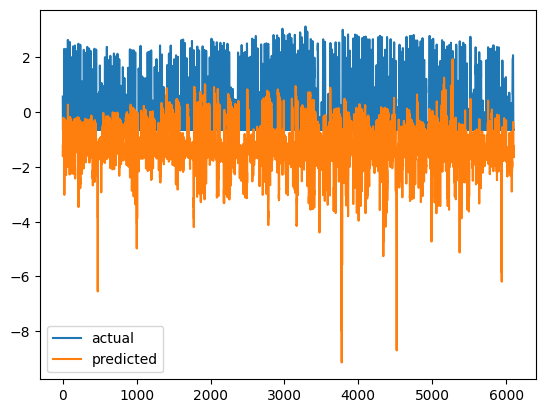

In [127]:
plt.plot(y_ts, label='actual')
plt.plot(predictions, label='predicted')
plt.legend()
plt.show()

In [128]:
y_ts

array([[ 0.56631253],
       [-0.6009994 ],
       [-0.65306358],
       ...,
       [-0.65306358],
       [-0.65306358],
       [-0.65306358]])

In [129]:
predictions

<tf.Tensor: shape=(6104, 1), dtype=float32, numpy=
array([[-1.2234547],
       [-1.6140435],
       [-1.5265783],
       ...,
       [-1.2573124],
       [-1.2204889],
       [-1.640754 ]], dtype=float32)>